<a href="https://colab.research.google.com/github/zlwmxkdla/graduation_capston/blob/main/age/age_add_lightedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
from zipfile import ZipFile
import time
from datetime import datetime
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

#신경망 가중치와 결과의 무작위성을 줄이기 위해 랜덤 시드를 설정
#결과를 완전히 재현하는 것은 여전히 어려울 수 있음

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# combined_faces 압축 파일 풀기

combined_faces_zip_path = "/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/age/1.1_age_input_output/input/combined_faces.zip"
extracted_path='/content/combined_faces'
with ZipFile(combined_faces_zip_path, 'r') as myzip:
    myzip.extractall(extracted_path)
    print('Done unzipping combined_faces.zip')

Done unzipping combined_faces.zip


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# 기존에 학습한 모델을 불러옵니다.
model = load_model('/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/age/1.1_age_input_output/output/your_updated_model.h5')



엑셀파일 만들기!!

In [ ]:
ages = []

path = '/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/change_brightness_lighted_UTK'
i = 0

for img_filename in os.listdir(path):
    i = i + 1
    age_gender_filename = img_filename.split("_")
     # Ensure that the file is an image file
    if not img_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    ages.append(int(age_gender_filename[0]))  # 이미지 파일 이름에서 나이 정보 추출

print(ages)

[20, 26, 26, 37, 25, 36, 51, 62, 36, 1, 26, 23, 28, 26, 28, 32, 24, 67, 56, 26, 3, 35, 45, 23, 52, 39, 26, 35, 17, 26, 20, 28, 2, 17, 1, 10, 70, 28, 26, 34, 30, 28, 58, 11, 39, 45, 31, 28, 31, 58, 19, 11, 26, 8, 16, 32, 23, 42, 60, 96, 82, 25, 54, 26, 22, 80, 9, 3, 22, 41, 36, 27, 28, 25, 49, 34, 16, 25, 45, 69, 61, 5, 30, 2, 50, 70, 51, 30, 34, 85, 54, 8, 24, 8, 26, 26, 35, 2, 1, 32, 27, 68, 35, 32, 15, 2, 29, 1, 24, 14, 15, 29, 44, 1, 28, 26, 68, 47, 29, 27, 26, 7, 26, 26, 30, 36, 1, 5, 24, 37, 1, 6, 38, 2, 1, 26, 25, 42, 32, 7, 72, 5, 27, 41, 18, 26, 26, 24, 26, 28, 58, 1, 1, 32, 54, 13, 24, 78, 45, 36, 30, 29, 18, 19, 47, 56, 39, 52, 35, 1, 24, 2, 44, 1, 24, 9, 2, 23, 62, 39, 3, 25, 10, 10, 35, 30, 35, 26, 12, 9, 26, 41, 81, 9, 36, 56, 39, 31, 50, 25, 1, 2, 28, 30, 32, 52, 12, 47, 22, 32, 26, 42, 33, 67, 25, 27, 29, 31, 25, 74, 24, 32, 1, 54, 54, 48, 27, 52, 26, 3, 26, 28, 54, 54, 9, 76, 30, 45, 1, 32, 38, 27, 47, 22, 1, 60, 5, 6, 42, 28, 40, 26, 61, 45, 24, 28, 1, 27, 27, 24, 27, 

In [ ]:
import os
import pandas as pd

# 사용자가 설정할 열 이름
column_name = 'filename'
column_name2 = 'age'

# 사진이 저장된 디렉토리 경로
photo_directory = '/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/change_brightness_lighted_UTK'

# 디렉토리에서 파일 목록 가져오기
photo_files = [f for f in os.listdir(photo_directory) if os.path.isfile(os.path.join(photo_directory, f))]

# 파일 목록을 DataFrame으로 변환
data = {column_name: photo_files}
df = pd.DataFrame(data)

# 추가할 문자열
additional_string = '/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/change_brightness_lighted_UTK/'

# 특정 열에 같은 문자열 추가
df[column_name] =additional_string+ df[column_name]

# age 관련 열 추가
df[column_name2] = ages

# DataFrame을 엑셀 파일로 저장
csv_filename = '/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/age/lighted_UTK.csv'
df.to_csv(csv_filename, index=False)

print(f"엑셀 파일이 생성되었습니다: {csv_filename}")


엑셀 파일이 생성되었습니다: /content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/age/lighted_UTK.csv


In [ ]:
# 증강된 데이터셋 블러와서 텐서 만들기

train_aug_df = pd.read_csv("/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/age/lighted_UTK.csv")
test_df = pd.read_csv("/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/age/1.1_age_input_output/input/images_filenames_labels_test_1.csv")

In [ ]:
# 나이 범주별 라벨링

def class_labels_reassign(age):

    if 1 <= age <= 5:
        return 0
    elif 6<= age <= 10:
        return 1
    elif 11 <= age <= 15:
        return 2
    elif 16 <= age <=20:
        return 3
    elif 21 <= age <= 26:
        return 4
    elif 27 <= age <= 32:
        return 5
    elif 33 <= age <= 39:
        return 6
    elif 40 <= age <= 48:
        return 7
    elif 49 <= age <= 56:
        return 8
    elif 57 <= age <= 65:
        return 9
    else:
        return 10

In [ ]:
train_aug_df['target'] = train_aug_df['age'].map(class_labels_reassign)
test_df['target'] = test_df['age'].map(class_labels_reassign)

In [ ]:
train_aug_df.head


<bound method NDFrame.head of                                               filename  age  target
0    /content/drive/MyDrive/GraduationCapston/Forei...  100      10
1    /content/drive/MyDrive/GraduationCapston/Forei...   57       9
2    /content/drive/MyDrive/GraduationCapston/Forei...   13       2
3    /content/drive/MyDrive/GraduationCapston/Forei...   29       5
4    /content/drive/MyDrive/GraduationCapston/Forei...   57       9
..                                                 ...  ...     ...
956  /content/drive/MyDrive/GraduationCapston/Forei...    1       0
957  /content/drive/MyDrive/GraduationCapston/Forei...   45       7
958  /content/drive/MyDrive/GraduationCapston/Forei...   33       6
959  /content/drive/MyDrive/GraduationCapston/Forei...   38       6
960  /content/drive/MyDrive/GraduationCapston/Forei...   24       4

[961 rows x 3 columns]>

In [ ]:
#이미지 크기 확인

import cv2
import os


def get_image_size(image_path):
    # 이미지를 읽어들임
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    if img is not None:
        # 이미지의 높이와 너비를 반환
        height, width = img.shape[:2]
        return height, width
    else:
        return None

# 이미지 파일이 들어있는 디렉토리 경로
image_directory = '/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/change_brightness_UTK'

# 디렉토리에서 파일 목록 가져오기
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# 각 이미지의 크기를 확인
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    size = get_image_size(image_path)

    if size is not None:
        print(f"Image: {image_file}, Size: {size}")
    else:
        print(f"Error reading image: {image_file}")


In [ ]:
# 증강된 훈련,검증 데이터셋들을 위해 파일 이름과 타겟 클래스 라벨 변경

train_aug_filenames_list = list(train_aug_df['filename'])
train_aug_labels_list = list(train_aug_df['target'])

test_filenames_list = list(test_df['filename'])
test_labels_list = list(test_df['target'])

In [ ]:
# 위에서 정의한 목록들을 사용하여 증강된(데이터를 늘린) 학습 및 테스트 데이터셋에 대한 TensorFlow 상수를 만들고, 파일 이름과 레이블을 나타내기

train_aug_filenames_tensor = tf.constant(train_aug_filenames_list)
train_aug_labels_tensor = tf.constant(train_aug_labels_list)

test_filenames_tensor = tf.constant(test_filenames_list)
test_labels_tensor = tf.constant(test_labels_list)

In [ ]:
# 주어진 텐서로부터 이미지를 읽고, 이미지를 해독하며, 이미지 레이블 클래스를 원-핫 인코딩하는 함수 정의.
# tf.io.decode_jpeg에서 channels 매개변수를 3에서 1로 변경하면 출력 이미지가 RGB 색상이 아닌 그레이스케일로 변함

num_classes = 11

def _parse_function(filename, label):

    image_string = tf.io.read_file(filename)
    image_decoded = tf.io.decode_jpeg(image_string, channels=1)    # channels=1 그레이 스케일로 바꾸기 위해서, channels=3 RGB로 바꾸기 위해서.
    # image_resized = tf.image.resize(image_decoded, [200, 200])
    label = tf.one_hot(label, num_classes)

    return image_decoded, label

In [ ]:
# 뉴런 네트워크를 위해 데이터셋 가져오기
# 위에서 정의한 텐서 벡터를 사용하여 데이터셋에서 이미지에 접근하고, 위에서 정의한 함수를 통해 이미지를 처리

train_aug_dataset = tf.data.Dataset.from_tensor_slices((train_aug_filenames_tensor, train_aug_labels_tensor))
train_aug_dataset = train_aug_dataset.map(_parse_function)
#train_aug_dataset = train_aug_dataset.repeat(3)
train_aug_dataset = train_aug_dataset.batch(512)    # 아래 model.fit()에서의 batch_size 하이퍼파라미터와 동일

test_dataset = tf.data.Dataset.from_tensor_slices((test_filenames_tensor, test_labels_tensor))
test_dataset = test_dataset.map(_parse_function)
#test_dataset = test_dataset.repeat(3)
test_dataset = test_dataset.batch(512)    # 아래 model.fit()에서의 batch_size 하이퍼파라미터와 동일

In [ ]:

# 모델을 계속해서 학습시킵니다.
# 이때, 기존의 모델의 가중치를 그대로 사용하므로 fine-tuning이라고도 합니다.
model.fit(train_aug_dataset, validation_data=test_dataset, epochs=30)

# 학습이 완료된 모델을 저장합니다.
model.save('/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/age/1.1_age_input_output/output/your_updated_model_2.h5')

Epoch 1/30
6/6 [==============================] - 102s 2s/step - loss: 0.0650 - accuracy: 0.9862 - val_loss: 0.6653 - val_accuracy: 0.8881
Epoch 2/30
6/6 [==============================] - 6s 1s/step - loss: 0.0394 - accuracy: 0.9854 - val_loss: 0.4905 - val_accuracy: 0.9154
Epoch 3/30
6/6 [==============================] - 6s 1s/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.4876 - val_accuracy: 0.9207
Epoch 4/30
6/6 [==============================] - 6s 1s/step - loss: 0.0157 - accuracy: 0.9935 - val_loss: 0.5450 - val_accuracy: 0.9135
Epoch 5/30
6/6 [==============================] - 6s 1s/step - loss: 0.0128 - accuracy: 0.9946 - val_loss: 0.5583 - val_accuracy: 0.9107
Epoch 6/30
6/6 [==============================] - 6s 1s/step - loss: 0.0054 - accuracy: 0.9966 - val_loss: 0.5483 - val_accuracy: 0.9120
Epoch 7/30
6/6 [==============================] - 6s 1s/step - loss: 0.0041 - accuracy: 0.9973 - val_loss: 0.5460 - val_accuracy: 0.9147
Epoch 8/30
6/6 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 위에서 정의한 신경망에서 학습 및 테스트 손실 및 정확도 값 확인

train_loss = model.history.history['loss']
test_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
test_accuracy = model.history.history['val_accuracy']

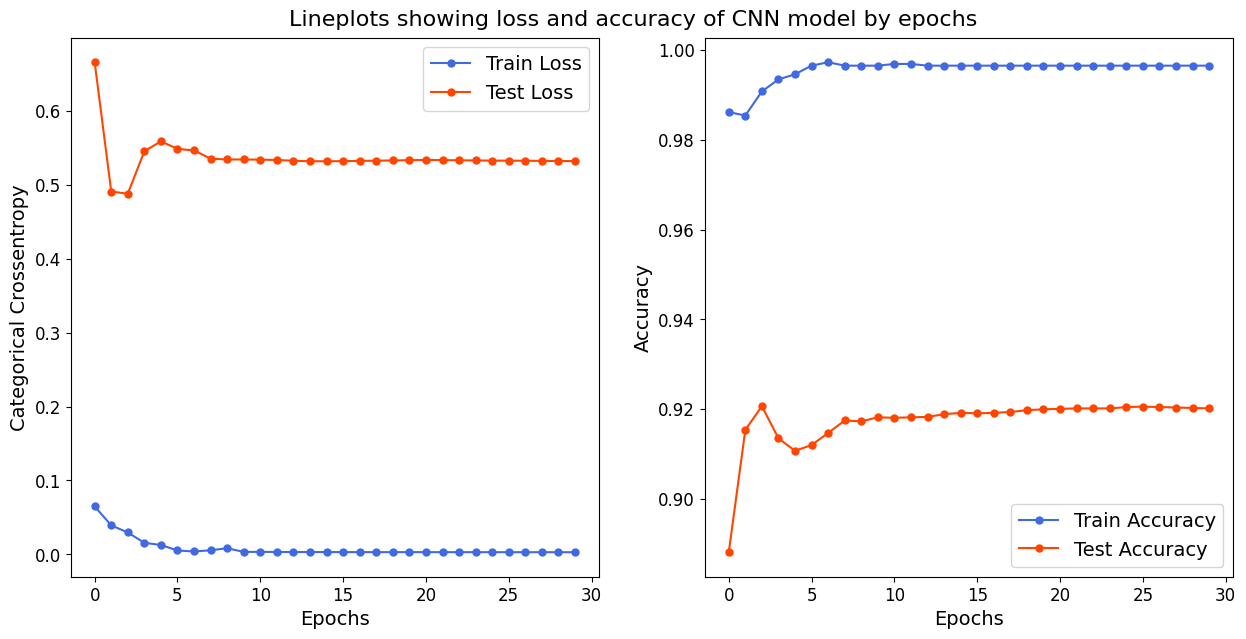

In [ ]:
# 에포크별로 손실과 정확도 값을 시각화하기 위해 선 그래프 그림.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

# PNG 형식으로 그래프 이미지를 출력
plt.savefig('/content/drive/My Drive/1_LiveProjects/Project5_AgeGenderEmotion_Detection/1.1_age_input_output/output/cnn_logs/age_add_lightedData.png', bbox_inches='tight');

In [ ]:
# 테스트 데이터셋에서 모델 평가

final_score = model.evaluate(test_dataset, verbose=1)

20/20 [==============================] - 3s 167ms/step - loss: 0.5317 - accuracy: 0.9202
